In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
d0 = pd.read_csv('./mnist_train.csv')

In [4]:
print(d0.head(20))

    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       1       0       0       0       0       0       0       0       0   
3       4       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       7       0       0       0       0       0       0       0       0   
7       3       0       0       0       0       0       0       0       0   
8       5       0       0       0       0       0       0       0       0   
9       3       0       0       0       0       0       0       0       0   
10      8       0       0       0       0       0       0       0       0   
11      9       0       0       0       0       0       0       0       0   

In [5]:
l = d0['label']
d = d0.drop("label",axis=1)
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


9


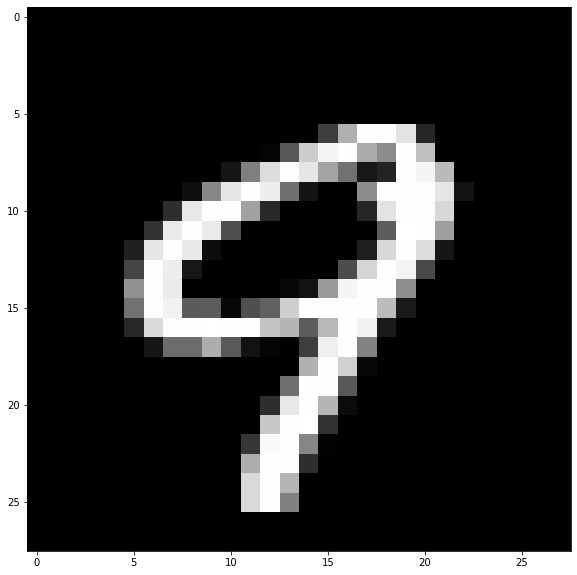

In [49]:
plt.figure(figsize=(10,10))
idx = 100

grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation = 'none', cmap='gray')
print(l[idx])

In [8]:
### PCA EXAMPLE
### picking 1st 15K points

labels = l.head(15000)
data = d.head(15000)

print(data.shape)

(15000, 784)


PCA EXAMPLE IMPORTANT IF NEEDED

In [10]:
## Data PreProcessing: Standardizing the Data

from sklearn.preprocessing import StandardScaler#perform standardizartion of data
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [16]:
#Covariance Matrix which is (A^T*A)

sample_data = standardized_data

#matrix multiplication using numpy

covar_matrix = np.matmul(sample_data.T,sample_data)
print(covar_matrix.shape)



(784, 784)


In [27]:
#Find the top 2 eigen values and corresponding eigen-vectors for projecting in 2D space
from scipy.linalg import eigh
#eigh returns the eigen values in ascending order
# 782 and 783 are top 2 eigen values

values,vectors = eigh(covar_matrix,eigvals=(782,783))

print(vectors.shape)

#transpose


vectors= vectors.T
print(vectors.shape)



(784, 2)
(2, 784)


In [48]:
#projecting the original data sample on the plane
#formed by top 2 eigen vectors by vector-vector multiplication
import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors,sample_data.T)
print("Resultant new data points", vectors.shape , "X" , sample_data.T.shape ,"=", new_coordinates.shape)

Resultant new data points (2, 784) X (784, 15000) = (2, 15000)


In [44]:
import pandas as pd
#vertical stack
#
new_coordinates = np.vstack((new_coordinates,labels)).T
# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


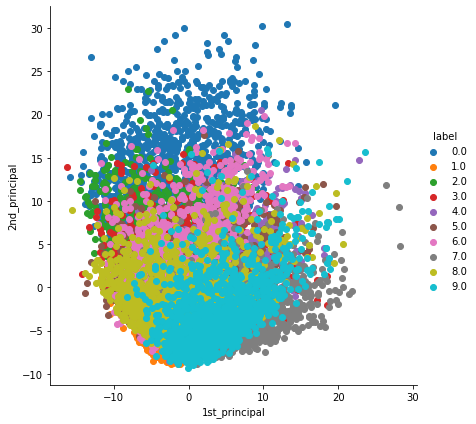

In [51]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [54]:
## PCA USING SCIKIT LEARN
from sklearn import decomposition
pca = decomposition.PCA()

In [57]:
# configuring the parameteres
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)#just input standardized data

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


C:\Users\KIIT\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


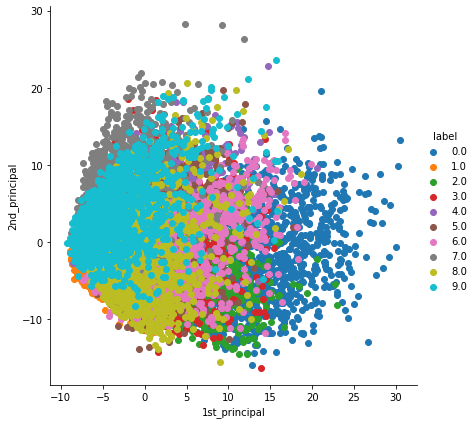

In [58]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, labels)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()